In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import StandardScaler
from lab_utils_multi import load_house_data
from lab_utils_common import dlc
plt.style.use('./deeplearning.mplstyle')

In [2]:
X_train, y_train = load_house_data()
X_features = ['size(sqft)', 'bedrooms', 'floors', 'age']

In [3]:
scaler = StandardScaler()
X_norm = scaler.fit_transform(X_train)

print("Without normalized peake to peak")
print(np.ptp(X_train,axis=0))

print("Normalized peak to peak")
print(np.ptp(X_norm,axis=0))

Without normalized peake to peak
[2.406e+03 4.000e+00 1.000e+00 9.500e+01]
Normalized peak to peak
[5.8452591  6.13529646 2.05626214 3.68533012]


In [4]:
sgdr = SGDRegressor()
sgdr.fit(X_norm, y_train)
print(sgdr)
print(f"Number of iterations completed = {sgdr.n_iter_}")
print(f"Number of weight updates = {sgdr.t_}")

SGDRegressor()
Number of iterations completed = 125
Number of weight updates = 12376.0


In [5]:
b_norm = sgdr.intercept_
w_norm = sgdr.coef_
print("Model parameters")
print(f"w_norm = {w_norm} and b_norm = {b_norm}")
print( "model parameters from previous lab: w: [110.56 -21.27 -32.71 -37.97], b: 363.16")

Model parameters
w_norm = [110.16146899 -21.06010329 -32.47412339 -38.03513668] and b_norm = [363.15629703]
model parameters from previous lab: w: [110.56 -21.27 -32.71 -37.97], b: 363.16


In [6]:
# make prediction using sgdr
y_predict_sgd = sgdr.predict(X_norm)

# make prediction usng w and b
y_predict = np.dot(X_norm, w_norm) + b_norm
print(f"prediction using model and w,b = {(y_predict_sgd==y_predict).all()}")

prediction using model and w,b = True


In [7]:
print("Prediction on training")
print(y_predict[:4])
print("Target values")
print(y_train[:4])

Prediction on training
[295.18667125 485.90484978 389.60319251 492.06742267]
Target values
[300.  509.8 394.  540. ]


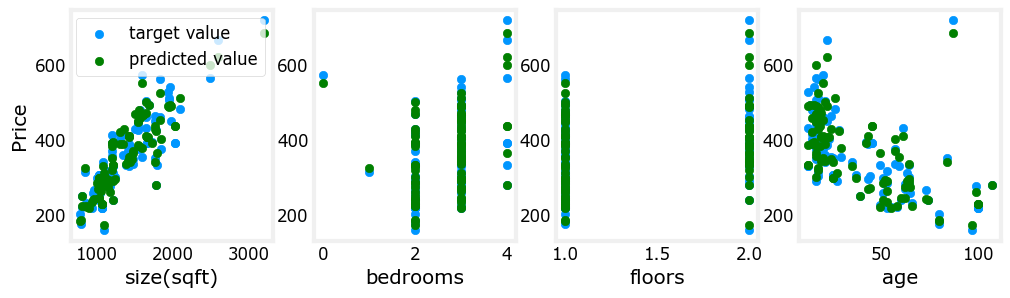

In [12]:
fig, ax = plt.subplots(1,4,figsize=(12,3))

for i in range(len(ax)):
    ax[i].scatter(X_train[:,i],y_train,label='target value')
    ax[i].set_xlabel(X_features[i])
    ax[i].scatter(X_train[:,i],y_predict,label='predicted value',
                  c='g')
ax[0].set_ylabel('Price')
ax[0].legend()
plt.show()
